* 영상 연산

In [2]:
import cv2
import numpy as np

In [11]:
# GrayScale

In [12]:
src1 = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
src2 = np.zeros(shape = src1.shape, dtype=np.uint8) + 50


#dst = src + 50 #벡터 연산이라 전 범위에서 50 플러스 됐다. 
dst = cv2.add(src1,src2)

In [13]:
cv2.imshow('src', src1)
cv2.imshow('dst', dst) # 255가 넘는 값들은 255로 나눈 나머지 연산이 되어 0에 가까워진다.
cv2.waitKey()
cv2.destroyAllWindows()

In [14]:
# Color

In [21]:
src1 = cv2.imread('./data/lena.jpg', cv2.IMREAD_COLOR) + 50
src2 = np.zeros(shape=src1.shape, dtype=np.uint8) + 50

dst = cv2.add(src1 - 50, src2)

In [22]:
cv2.imshow('src1', src1)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

* 영상 연산 (비트 연산)

In [72]:
lena = cv2.imread('./data/lena.jpg')
logo = cv2.imread('./data/opencv_logo.png')

rows, cols, channel = logo.shape
roi = lena[:rows,:cols]
#roi.shape #rows, cols = (172, 199)

logo_gray = cv2.cvtColor(logo, cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(logo_gray, 160, 255, cv2.THRESH_BINARY)# 요소, 임계값, 0또는 ?에서 ?의 값 ret은 임계치 
#역전하려면 _INV를 붙이면 아래의 코드와 같아짐
mask_inv = cv2.bitwise_not(mask) #비트연선자로 대척점의 값으로 바꿔준다. 역전함수
lena_bg = cv2.bitwise_and(roi, roi, mask = mask) #0인부분은 and라서 사라지고 255인부분은 mask를 받아와서 배경이 그대로 살아난다.
logo_fg = cv2.bitwise_and(logo, logo, mask = mask_inv)
dst = cv2.bitwise_or(lena_bg, logo_fg)
lena[:rows,:cols] = dst

cv2.imshow('lena', lena)
cv2.waitKey()
cv2.destroyAllWindows()

In [155]:
field = cv2.imread('./data/field.bmp')
airplane = cv2.imread('./data/airplane.bmp')
airplane_gray = cv2.imread('./data/airplane.bmp', cv2.IMREAD_GRAYSCALE)

ret, mask = cv2.threshold(airplane_gray, 160, 255, cv2.THRESH_BINARY_INV)
mask_inv = cv2.bitwise_not(mask)
airplane_fg = cv2.bitwise_and(airplane, airplane, mask = mask)
field_bg = cv2.bitwise_and(field, field, mask = mask_inv)

dst = cv2.bitwise_or(airplane_fg, field_bg)

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [119]:
airplane = cv2.imread('./data/mask_plane.bmp')

In [153]:
field = cv2.imread('./data/field.bmp')
airplane = cv2.imread('./data/airplane.bmp')
airplane_gray = cv2.imread('./data/mask_plane.bmp', cv2.IMREAD_GRAYSCALE)

ret, mask = cv2.threshold(airplane_gray, 163, 255, cv2.THRESH_BINARY)
mask_inv = cv2.bitwise_not(mask)
airplane_fg = cv2.bitwise_and(airplane, airplane, mask = mask)
field_bg = cv2.bitwise_and(field, field, mask = mask_inv)

dst = cv2.bitwise_or(airplane_fg, field_bg)

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

* 반전영상

In [156]:
src1 = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)
src2 = np.zeros(shape=src1.shape, dtype=np.uint8) + 255

In [157]:
dst1 = 255 - src1
dst2 = cv2.subtract(src2, src1) #뺄셈 연산인데 255를 빼면 결국 제자리임.

In [159]:
cv2.imshow('dst1', dst1)
cv2.imshow('dst2', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

* 명암비 정규화

In [160]:
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(src)

#minVal, maxVal, minLoc, maxLoc #벨류랑 벨류의 위치를 알려줌 위치는 cv2라서 x, y이다. 색인할때는 y, x로 해야함

dst = cv2.normalize(src, None, 100, 200, cv2.NORM_MINMAX)

minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(dst)

#minVal, maxVal, minLoc, maxLoc #최소 최대는 무조건 100과 200사이. 흐릿해진다.

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 영상의 이진화

In [182]:
src = cv2.imread('./data/Heart10.jpg', cv2.IMREAD_GRAYSCALE)

ret, dst = cv2.threshold(src, 180, 255, cv2.THRESH_BINARY)

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [190]:
src = cv2.imread('./data/Heart10.jpg', cv2.IMREAD_GRAYSCALE)

ret, dst = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU) #오츠로 하면 임계값이 자동이다! 두개를 같이 써야 한다.

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

* 적응형 이진화

In [218]:
src = cv2.imread('./data/srcThreshold.png', cv2.IMREAD_GRAYSCALE) #적응형 이진화는 블럭단위로 나누고 블럭 단위로 이진화 하는 것임

ret1, dst1 = cv2.threshold(src, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU) #이대로는 오른쪽 상단의 그림자가 가려진다.

In [219]:
ret1

149.0

In [220]:
dst2 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, 7) 
# 대상, 0이 아닌 상대값, 구하는 공식 (가우시안 , 평균),이분화함수, n등분하기, 빼는 값(c)

In [221]:
dst3 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 51, 7) 
# 대상, 0이 아닌 상대값, 구하는 공식 (가우시안 , 평균),이분화함수, 구역크기는 n*n인데 그중 n, 빼는 값(c)

In [224]:
cv2.imshow('src', src)
cv2.imshow('dst1', dst1)
cv2.imshow('dst_mean', dst2) # mean이 더 좋은 듯
cv2.imshow('dst_gaussian', dst3)
cv2.waitKey()
cv2.destroyAllWindows()

In [466]:
src = cv2.imread('./data/0002.jpg', cv2.IMREAD_GRAYSCALE)
dst2 = cv2.adaptiveThreshold(src, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 51, 7)
cv2.imshow('dst_gaussian', dst2)
cv2.waitKey()
cv2.destroyAllWindows()

In [468]:
cv2.imwrite('./output/0002.jpg', dst2)

True

* 실습

selectROIs() 함수로 roi 2개를 입력 받아 각각 다른 효과 주기
1. 첫번째 roi는 그레이스케일로 변환후 150을 임계값으로 이진화
2. 두번째 roi는 반전

In [278]:
src = cv2.imread('./data/lena.jpg')
dst = src.copy()

roi1 = cv2.selectROI(dst)
roi2 = cv2.selectROI(dst)

dst2 = dst[roi1[1]:roi1[1] + roi1[3], roi1[0]: roi1[0] +roi1[2]]

dst_gray = cv2.cvtColor(dst2, cv2.COLOR_BGR2GRAY)
ret, dst3 = cv2.threshold(dst_gray, 150, 255, cv2.THRESH_BINARY)
merge = cv2.merge([dst3, dst3, dst3])

dst[roi1[1]:roi1[1] + roi1[3], roi1[0]: roi1[0] +roi1[2]] = merge
dst[roi2[1]:roi2[1] + roi2[3], roi2[0]: roi2[0] +roi2[2]] = 255 - dst[roi2[1]:roi2[1] + roi2[3], roi2[0]: roi2[0] +roi2[2]]
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

In [273]:
src = cv2.imread('./data/lena.jpg')
dst = src.copy()

rois = cv2.selectROIs('src', src, True, False)

idx = 0
for r in rois:
    tmp = dst[r[1]:r[1]+r[3], r[0]:r[0]+r[2]]
    if idx == 0: 
        tmp = cv2.cvtColor(tmp, cv2.COLOR_BGR2GRAY)
        ret, dst1 = cv2.threshold(tmp, 180, 255, cv2.THRESH_BINARY)
        dst[r[1]:r[1]+r[3], r[0]:r[0]+r[2]][:, :, 0] = dst1
        dst[r[1]:r[1]+r[3], r[0]:r[0]+r[2]][:, :, 1] = dst1
        dst[r[1]:r[1]+r[3], r[0]:r[0]+r[2]][:, :, 2] = dst1
        
    else:
        dst[r[1]:r[1]+r[3], r[0]:r[0]+r[2]] = 255 - tmp
    idx += 1

cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

## 히스토그램 분석

* 히스토그램 분석

In [280]:
src =  np.array([[0, 0, 0, 0],
               [1, 1, 3 ,5],
               [6, 1, 1, 3],
               [4, 3, 1, 7]], dtype=np.uint8)

In [285]:
hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
            histSize=[4], ranges=[0, 8]) # 4개의 구간으로 본다 (0~1, 2~3, 4~5, 6~7)

In [286]:
hist1 
# (0~1, 2~3, 4~5, 6~7) 해당구간에서의 값 개수 0이 4개 5가 5개해서 0~1은 9, 3이 3개라서 2~3은 3, 4가 1개 5가 1개 해서 2개 6, 7 각각 1개씩 해서 2개

array([[9.],
       [3.],
       [2.],
       [2.]], dtype=float32)

In [289]:
hist2 = cv2.calcHist(images=[src], channels=[0], mask=None,
            histSize=[4], ranges=[0, 4]) # 0부터 4까지만 가져오고 나머지 값은 사용 x


In [290]:
hist2

array([[4.],
       [5.],
       [0.],
       [3.]], dtype=float32)

In [291]:
hist3 = cv2.calcHist(images=[src], channels=[0], mask=None,
            histSize=[8], ranges=[0, 8])

In [292]:
hist3

array([[4.],
       [5.],
       [0.],
       [3.],
       [1.],
       [1.],
       [1.],
       [1.]], dtype=float32)

* 히스토그램 분석(lena 이미지)

In [301]:
src = cv2.imread('./data/lena.jpg', cv2.IMREAD_GRAYSCALE)

In [316]:
hist_lena = cv2.calcHist(images=[src], channels=[0], mask=None,
                        histSize=[32], ranges=[0, 255])

In [ ]:
import matplotlib.pyplot as plt

hist_lena = hist_lena.flatten()
plt.plot(hist_lena, color='orange')
binX = np.arange(32)
plt.bar(binX, hist_lena, width=1, color='b')

<BarContainer object of 256 artists>

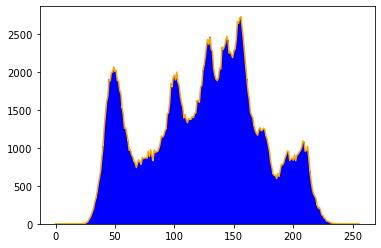

In [337]:
# lena 2, range is 256

hist_lena2 = cv2.calcHist(images=[src], channels=[0], mask=None,
                        histSize=[256], ranges=[0, 255])

hist_lena2 = hist_lena2.flatten()
plt.plot(hist_lena2, color='orange')
binX = np.arange(256)
plt.bar(binX, hist_lena2, width=1, color='b')

* 채널별 히스토그램 분석 (lena 이미지)

In [339]:
src = cv2.imread('./data/lena.jpg')

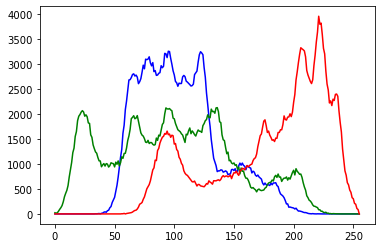

In [344]:
Color = ['b', 'g', 'r']

for i in range(3):
    hist = cv2.calcHist(images=[src], channels=[i], mask=None,
                       histSize=[256], ranges=[0, 255])
    plt.plot(hist, color=Color[i])
# 해석 붉은 톤이 많은 lena는 붉은 톤의 값이 대다수 높은 쪽에 분포해있다. 나머지는 중간 이하.

* 히스토그램 스트레칭

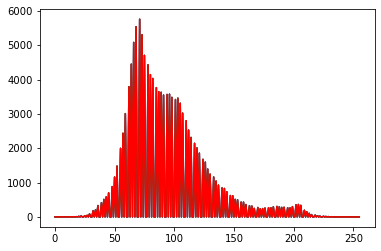

In [389]:
src = cv2.imread('./data/hawkes.bmp')
color = ['b', 'g', 'r']
for i in range(3):
    minVal, maxVal, minLoc, macLoc = cv2.minMaxLoc(src[:,:,i])
    dst = np.uint8((src[:,:,i]-minVal) / (maxVal - minVal) * 255)
    src[:,:,i] = dst
    hist = cv2.calcHist(images=[src], channels=[i], mask=None,
                    histSize=[256], ranges=[0, 255])
    plt.plot(hist, color=Color[i])
cv2.imshow('src', src)
cv2.waitKey()
cv2.destroyAllWindows()

<BarContainer object of 256 artists>

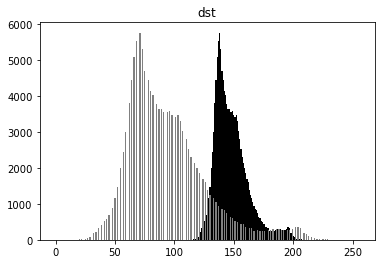

In [386]:
src = cv2.imread('./data/hawkes.bmp', cv2.IMREAD_GRAYSCALE)
minVal, maxVal, minLoc, macLoc = cv2.minMaxLoc(src)
dst = np.uint8((src-minVal) / (maxVal - minVal) * 255)

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                histSize=[256], ranges=[0, 255])
hist2 = cv2.calcHist(images=[dst], channels=[0], mask=None,
                histSize=[256], ranges=[0, 255])
hist1 = hist1.flatten()
hist2 = hist2.flatten()

plt.title('src')
binX = np.arange(256)
plt.bar(binX, hist1, width=1, color='black')

plt.title('dst')
binX = np.arange(256)
plt.bar(binX, hist2, width=1, color='gray') #src보다 dst가 더 넓게 펴져있다.

* 히스토그램 평활화

In [388]:
src =  np.array([[0, 0, 0, 0],
               [1, 1, 3 ,5],
               [6, 1, 1, 3],
               [4, 3, 1, 7]], dtype=np.uint8)
dst = cv2.equalizeHist(src)
dst #각 값을 255의 범위로 만드는데 단순히 값으로 나누는게 아니라 비율로 나누는 듯. min은 0 max는 255

array([[  0,   0,   0,   0],
       [106, 106, 170, 212],
       [234, 106, 106, 170],
       [191, 170, 106, 255]], dtype=uint8)

In [390]:
src = cv2.imread('./data/hawkes.bmp', cv2.IMREAD_GRAYSCALE)
dst = cv2.equalizeHist(src)
cv2.imshow('src', src)
cv2.imshow('dst', dst)
cv2.waitKey()
cv2.destroyAllWindows()

<BarContainer object of 256 artists>

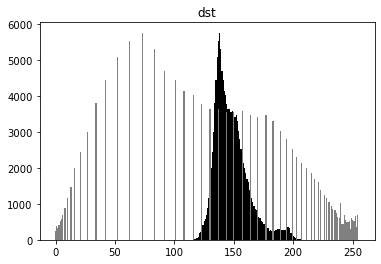

In [392]:
hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                histSize=[256], ranges=[0, 255])
hist2 = cv2.calcHist(images=[dst], channels=[0], mask=None,
                histSize=[256], ranges=[0, 255])
hist1 = hist1.flatten()
hist2 = hist2.flatten()

plt.title('src')
binX = np.arange(256)
plt.bar(binX, hist1, width=1, color='black')

plt.title('dst')
binX = np.arange(256)
plt.bar(binX, hist2, width=1, color='gray') #차이가 확연한 것을 볼 수 있다.

* 히스토그램 평활화 (peppers 컬러) - fali

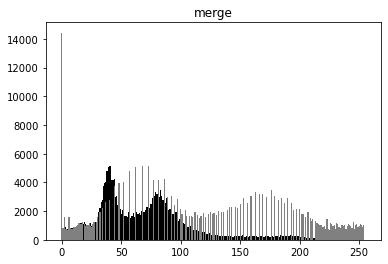

In [413]:
src = cv2.imread('./data/pepper.bmp')
dst = src.copy()
now = [0, 0, 0]

for i in range(3):
    temp = dst[:,:,i]
    now[i] = cv2.equalizeHist(temp)

merge = cv2.merge([now[0], now[1], now[2]])


hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                histSize=[256], ranges=[0, 255])
hist2 = cv2.calcHist(images=[merge], channels=[0], mask=None,
                histSize=[256], ranges=[0, 255])
hist1 = hist1.flatten()
hist2 = hist2.flatten()

plt.title('src')
binX = np.arange(256)
plt.bar(binX, hist1, width=1, color='black')

plt.title('merge')
binX = np.arange(256)
plt.bar(binX, hist2, width=1, color='gray') #차이가 확연한 것을 볼 수 있다.

cv2.imshow('src', src)
cv2.imshow('merge', merge) 
#각자 평활화 하기에 더 또렷하지 않게 된다. 그래서 컬러를 평활화 할때는 색상은 건드리지 말고, 밝기만 평활화하는게 좋다
cv2.waitKey()
cv2.destroyAllWindows()

* 히스토그램 평활화 (peppers 컬러) - true

In [428]:
src = cv2.imread('./data/pepper.bmp')

YCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, Cr, Cb = cv2.split(YCrCb)

ye = cv2.equalizeHist(y)
dst = cv2.merge([ye, Cr, Cb])
dst2 = cv2.cvtColor(dst, cv2.COLOR_YCrCb2BGR)
cv2.imshow('src', src)
cv2.imshow('dst', dst2) 
cv2.waitKey()
cv2.destroyAllWindows()

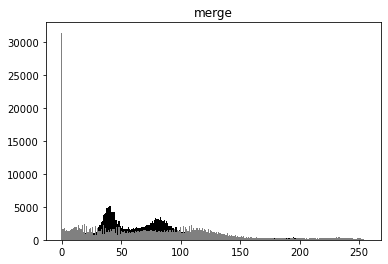

In [430]:
src = cv2.imread('./data/pepper.bmp')

YCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, Cr, Cb = cv2.split(YCrCb)

ye = cv2.equalizeHist(y)
merge = cv2.merge([ye, Cr, Cb])
merge = cv2.cvtColor(dst, cv2.COLOR_YCrCb2BGR)


hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                histSize=[256], ranges=[0, 255])
hist2 = cv2.calcHist(images=[merge], channels=[0], mask=None,
                histSize=[256], ranges=[0, 255])
hist1 = hist1.flatten()
hist2 = hist2.flatten()

plt.title('src')
binX = np.arange(256)
plt.bar(binX, hist1, width=1, color='black')

plt.title('merge')
binX = np.arange(256)
plt.bar(binX, hist2, width=1, color='gray') #차이가 확연한 것을 볼 수 있다.

cv2.imshow('src', src)
cv2.imshow('merge', merge) 
#각자 평활화 하기에 더 또렷하지 않게 된다. 그래서 컬러를 평활화 할때는 색상은 건드리지 말고, 밝기만 평활화하는게 좋다
cv2.waitKey()
cv2.destroyAllWindows()

* 히스토그램 평활화 (lena) hsv로

In [456]:
src = cv2.imread('./data/lena.jpg')

dst = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(dst)

Ve = cv2.equalizeHist(V)
dst1 = cv2.merge([H, S, Ve])
dst2 = cv2.cvtColor(dst1, cv2.COLOR_HSV2BGR)

cv2.imshow('src', src)
cv2.imshow('dst', dst2) 
cv2.waitKey()
cv2.destroyAllWindows()

In [463]:
src = cv2.imread('./data/lena.jpg')

YCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, Cr, Cb = cv2.split(YCrCb)

ye = cv2.equalizeHist(y)
dst1 = cv2.merge([ye, Cr, Cb])
dst2 = cv2.cvtColor(dst1, cv2.COLOR_YCrCb2BGR)

cv2.imshow('src', src)
cv2.imshow('dst', dst2) 
cv2.waitKey()
cv2.destroyAllWindows()

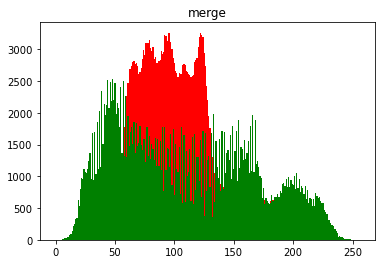

In [462]:
src = cv2.imread('./data/lena.jpg')

YCrCb = cv2.cvtColor(src, cv2.COLOR_BGR2YCrCb)
y, Cr, Cb = cv2.split(YCrCb)

ye = cv2.equalizeHist(y)
dst1 = cv2.merge([ye, Cr, Cb])
dst2 = cv2.cvtColor(dst1, cv2.COLOR_YCrCb2BGR)


hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                histSize=[256], ranges=[0, 255])
hist2 = cv2.calcHist(images=[dst2], channels=[0], mask=None,
                histSize=[256], ranges=[0, 255])
hist1 = hist1.flatten()
hist2 = hist2.flatten()

plt.title('src')
binX = np.arange(256)
plt.bar(binX, hist1, width=1, color='r')

plt.title('merge')
binX = np.arange(256)
plt.bar(binX, hist2, width=1, color='g') #차이가 확연한 것을 볼 수 있다.

cv2.imshow('src', src)
cv2.imshow('merge', dst2) 
#각자 평활화 하기에 더 또렷하지 않게 된다. 그래서 컬러를 평활화 할때는 색상은 건드리지 말고, 밝기만 평활화하는게 좋다
cv2.waitKey()
cv2.destroyAllWindows()

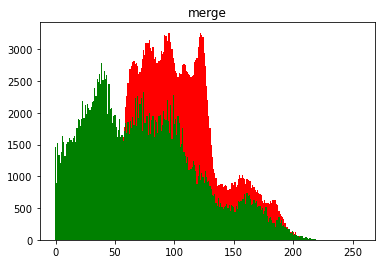

In [459]:
src = cv2.imread('./data/lena.jpg')

dst = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
H, S, V = cv2.split(dst)

Ve = cv2.equalizeHist(V)
dst1 = cv2.merge([H, S, Ve])
dst2 = cv2.cvtColor(dst1, cv2.COLOR_HSV2BGR)

hist1 = cv2.calcHist(images=[src], channels=[0], mask=None,
                histSize=[256], ranges=[0, 255])
hist2 = cv2.calcHist(images=[dst2], channels=[0], mask=None,
                histSize=[256], ranges=[0, 255])
hist1 = hist1.flatten()
hist2 = hist2.flatten()

plt.title('src')
binX = np.arange(256)
plt.bar(binX, hist1, width=1, color='r')

plt.title('merge')
binX = np.arange(256)
plt.bar(binX, hist2, width=1, color='g') #차이가 확연한 것을 볼 수 있다.

cv2.imshow('src', src)
cv2.imshow('merge', dst2) 
#각자 평활화 하기에 더 또렷하지 않게 된다. 그래서 컬러를 평활화 할때는 색상은 건드리지 말고, 밝기만 평활화하는게 좋다
cv2.waitKey()
cv2.destroyAllWindows()

In [ ]:
cv2.imshow('src', src)
cv2.imshow('merge', dst2)
cv2.imshow('merge', dst2) 
cv2.waitKey()
cv2.destroyAllWindows()

# 히스토그램 역투영

* 히스토그램 역투영

In [520]:
src =  np.array([[0, 0, 0, 0],
               [1, 1, 3 ,5],
               [6, 1, 1, 3],
               [4, 3, 1, 7]], dtype=np.uint8)
hist = cv2.calcHist(images=[src], channels=[0], mask=None,
                   histSize=[4], ranges=[0, 8])
hist

array([[9.],
       [3.],
       [2.],
       [2.]], dtype=float32)

In [521]:
backP = cv2.calcBackProject([src], [0], hist, [0, 8], scale=1)

In [522]:
backP #나타내는것은 hist에서 나타냈던 빈도수이다.

array([[9, 9, 9, 9],
       [9, 9, 3, 2],
       [2, 9, 9, 3],
       [2, 3, 9, 2]], dtype=uint8)

In [566]:
src = cv2.imread('./data/fruits.jpg')

hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)

roi = cv2.selectROI(src)
cv2.destroyAllWindows()
roi_h = h[roi[1]: roi[1]+roi[3], roi[0] : roi[0] + roi[2]]

hist = cv2.calcHist([roi_h], [0], None, [64], [0, 256])
backP = cv2.calcBackProject([h.astype(np.float32)], [0], hist, [0, 256], scale = 1)

hist = cv2.sort(hist, cv2.SORT_EVERY_COLUMN + cv2.SORT_DESCENDING) #모든 값에 대해 내림차순 정렬
T = hist[1][0]
ret, dst = cv2.threshold(backP, T, 255, cv2.THRESH_BINARY)
a = cv2.bitwise_and(dst, dst, mask=h)
cv2.imshow('src', dst)
cv2.imshow('dst', a)
cv2.waitKey()
cv2.destroyAllWindows()

In [558]:
dst.shape

(480, 512)

In [559]:
src.shape

(480, 512, 3)

In [571]:
a = cv2.bitwise_and(h, h, mask=dst)
cv2.imshow('dst', a)
cv2.waitKey()
cv2.destroyAllWindows()

error: OpenCV(4.5.2) C:\Users\runneradmin\AppData\Local\Temp\pip-req-build-_8k9tw8n\opencv\modules\core\src\arithm.cpp:230: error: (-215:Assertion failed) (mtype == CV_8U || mtype == CV_8S) && _mask.sameSize(*psrc1) in function 'cv::binary_op'


In [552]:
dst[dst > 255]

array([], dtype=float32)

In [540]:
backP

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)